### Neccessary Packages

In [183]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf

plt.style.use('seaborn-white')

import statsmodels
%matplotlib inline
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa import stattools


In [184]:
df = pd.read_csv('data/TG_clean.csv', index_col=0, parse_dates=True)

In [185]:
df.head()

,SOUID,TG,Q_TG,MONTH
DATE,,,,
1876-01-01,127488,2.2,0,1
1876-01-02,127488,2.5,0,1
1876-01-03,127488,0.3,0,1
1876-01-04,127488,-5.8,0,1
1876-01-05,127488,-9.8,0,1


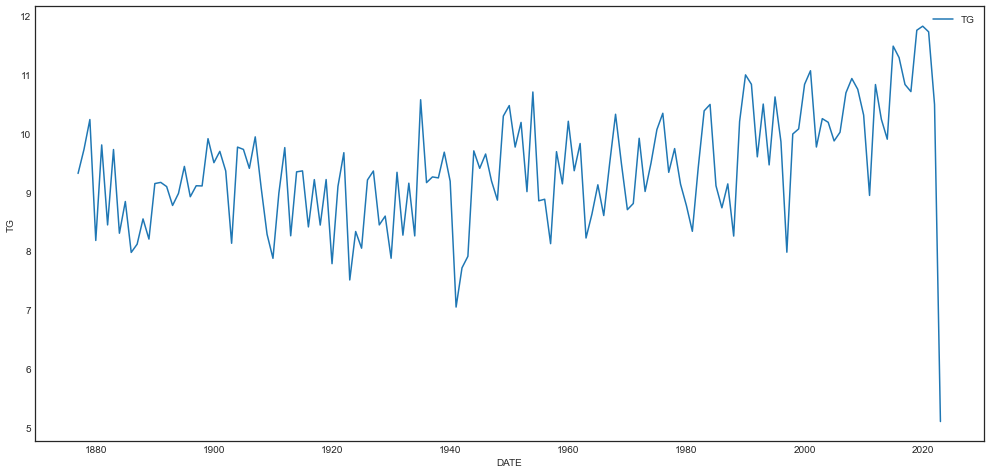

In [186]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize = (17,8))
plt.gcf().set_facecolor('white')
sns.lineplot(x = df.resample('Y').mean().index, y = 'TG',data = df.resample('Y').mean() , label="TG")
plt.legend(loc='upper right')

# Check Seasonality

In [187]:
df_remainder = pd.read_csv('data/TG_remainder.csv', index_col=0, parse_dates=True)

In [188]:
df_remainder.head()

,remainder
DATE,
1876-01-01,3.069966
1876-01-02,3.369933
1876-01-03,1.169899
1876-01-04,-4.930134
1876-01-05,-8.930167


In [189]:
def print_adf(data):
    
    """ Prints the results of the augmented Dickey Fuller Test"""
    
    adf_stats, p, used_lag, n_obs, levels, information_criterion = \
            statsmodels.tsa.stattools.adfuller(data)
    
    print(f"""adf_stats: {adf_stats}
            p: {p} 
            used lag: {used_lag} 
            number of observations: {n_obs}
            CI 99%: {levels['1%']}
            CI 95%: {levels['5%']}
            CI 90%: {levels['10%']}
            information criterion (AIC): {information_criterion}
            """)

In [190]:
print_adf(df_remainder["remainder"])

adf_stats: -23.792750707433168
            p: 0.0 
            used lag: 58 
            number of observations: 53357
            CI 99%: -3.4304725633867306
            CI 95%: -2.861594170574927
            CI 90%: -2.566798833192372
            information criterion (AIC): 240665.2871053764
            


### AUTO ARIMA

In [191]:
y=df.loc["2020-01-01":"2022-03-31","TG"]

In [192]:
arima = pm.AutoARIMA(
  
)

arima.fit(y)
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  821
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1782.200
Date:                Fri, 29 Apr 2022   AIC                           3572.400
Time:                        13:55:37   BIC                           3591.237
Sample:                             0   HQIC                          3579.628
                                - 821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8879      0.040     22.019      0.000       0.809       0.967
ar.L2         -0.2774      0.035     -7.906      0.000      -0.346      -0.209
ma.L1         -0.8557      0.031    -27.221      0.000      -0.917      -0.794
sigma2         4.5191      0.174     25.899      0.000       4.177       4.861
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                68.08
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.02
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [193]:
# forecast for the next 2 years with uncertainty area
y_forecast, ci = arima.predict(n_periods=365*2, return_conf_int=True)

# create some date values for the forecast horizon
index_vals = pd.date_range('2022-04-01', '2024-03-30', freq='D')


In [194]:
len(y_forecast)

730

In [195]:
len(index_vals)

730

In [196]:
df_predict=pd.DataFrame()

In [197]:
df_predict["forecast"]=y_forecast

In [198]:
df_predict.set_index(index_vals)

,forecast
2022-04-01,16.529240
2022-04-02,14.729692
2022-04-03,12.818539
2022-04-04,11.620875
2022-04-05,11.087695
...,...
2024-03-26,11.105150
2024-03-27,11.105150
2024-03-28,11.105150
2024-03-29,11.105150


In [199]:
df_predict["forecast"].min()

10.9465648807721

In [200]:
df_predict["forecast"].max()

16.529240407749175

In [201]:
df_predict["forecast"].value_counts()

11.105150    675
11.105150      2
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
11.105150      1
16.529240      1
14.729692      1
11.106657      1
12.818539      1
11.620875      1
11.087695      1
10.946565      1
10.969182      1
11.028421      1
11.074745      1
11.099441      1
11.108516      1
11.109723      1
11.108276      1
11.105621      1
11.105150      1
11.105150      1
11.105019      1
11.105034      1
11.105083      1
11.105123      1
11.105144      1
11.105152      1
11.105153      1
11.105152      1
11.105151      1
11.105150      1
11.105150      1
Name: forecast, dtype: int64

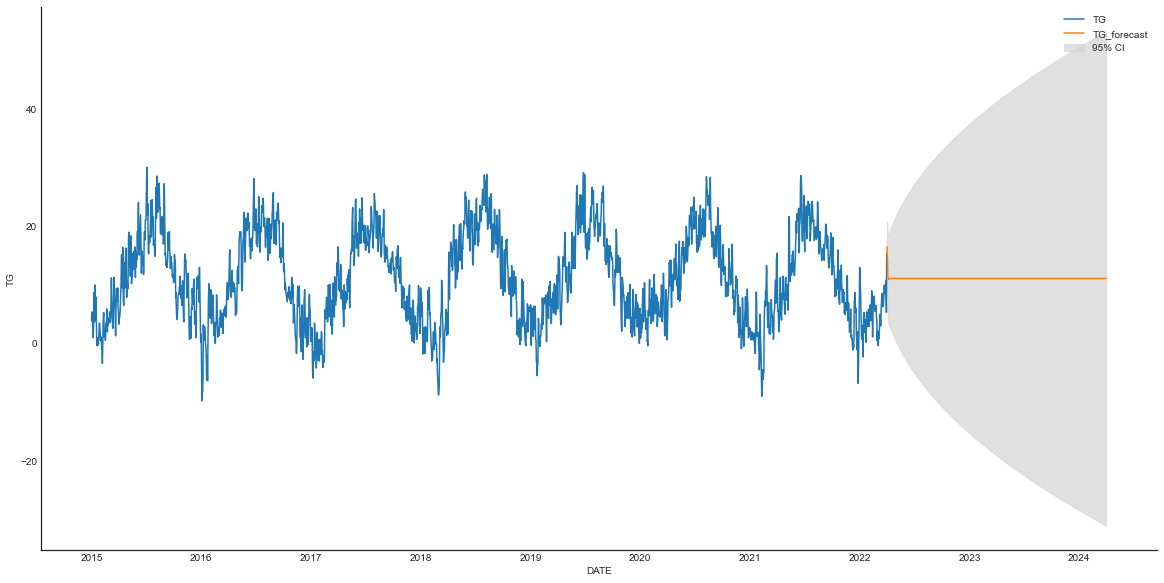

In [205]:

plt.figure(figsize=(20,10))
plt.gcf().set_facecolor('white')
sns.lineplot(x = df.loc["2015-01-01":"2022-03-31"].index, y = 'TG',data = df.loc["2015-01-01":"2022-03-31"] , label="TG")
#plt.plot(y.index.values, y.values)
plt.fill_between(index_vals.values, ci[:,0], ci[:, 1], alpha=0.7, color='lightgrey', label='95% CI')
#plt.plot(index_vals.values, y_forecast, label='TG Forecast', marker='.')
sns.lineplot(x = index_vals.values, y = y_forecast , label="TG_forecast")
#sns.lineplot(x = df_predict.resample('Y').mean().index, y = 'forecast',data = df_predict.resample('Y').mean() , label="TG")
sns.despine()
plt.legend()